In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [2]:
from konlpy.tag import Hannanum
from urllib.request import urlopen
from lxml import html
from collections import Counter
import nltk

import random
import pytagcloud      # requires Korean font support
import webbrowser

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
word = pd.read_csv('./teample_1/hankyure_society_utf.csv', sep=',', encoding='utf-8')
word

,Unnamed: 0,날짜,제목
0,0,2018-11-13,대한민국 ‘일자리대학’의 표준을 만든다
1,1,2018-11-13,‘밥 한 공기 300원 보장’…농민들의 임금투쟁
2,2,2018-11-13,올해도 어김없이 ‘박정희 대통령 101회 탄신제’
3,3,2018-11-13,‘처음학교로’ 참여 의무화 조례는 서울뿐
4,4,2018-11-13,"[포토] 비정규직 노동자, 대검찰청 연좌농성"
5,5,2018-11-13,[영상] 미성년자 노리는 지능형 성폭력 ‘그루밍’은 무엇인가
6,6,2018-11-13,“국민연금 소득대체율 50%는 소신…정책은 탄력적으로”
7,7,2018-11-13,‘사법농단’ 임종헌 14일 기소…전 대법관들 줄소환 가시권
8,8,2018-11-13,"대구시교육감, 교육자치법 위반 혐의로 검찰 송치"
9,9,2018-11-13,조명래 환경장관 “중국발 미세먼지 TF 구성”


In [4]:
xyz = list(word['제목'])

In [5]:
words = str()

for i in range(len(xyz)):
    words += xyz[i]

words

'대한민국 ‘일자리대학’의 표준을 만든다‘밥 한 공기 300원 보장’…농민들의 임금투쟁올해도 어김없이 ‘박정희 대통령 101회 탄신제’‘처음학교로’ 참여 의무화 조례는 서울뿐[포토] 비정규직 노동자, 대검찰청 연좌농성[영상] 미성년자 노리는 지능형 성폭력 ‘그루밍’은 무엇인가“국민연금 소득대체율 50%는 소신…정책은 탄력적으로”‘사법농단’ 임종헌 14일 기소…전 대법관들 줄소환 가시권대구시교육감, 교육자치법 위반 혐의로 검찰 송치조명래 환경장관 “중국발 미세먼지 TF 구성”전북대 총장 선거 경찰 개입 의혹에 교수들 “진실규명하자”현직 검사장 “검찰 수사권 없애고 경찰 수사지휘에 집중해야”정치인 6명 ‘쪼개기 후원’ 의혹, 어린이집총연합회에 무슨 일이?한사성 “양진호, 불법촬영 영상물 판 돈으로 로봇 개발하고 탈세 의혹”“미세먼지 줄이려면 경유값 9% 이상 올려야”전문가들 “서울 미세먼지 심할 땐 충청까지 조치해야”“해양관광 1번지 옹진 기대하세요”성남∼부천 50㎞ 음주운전 후 사고…법원 “심신미약 아냐”대구시청 청소·검침원 등 393명 정규직 전환“무상교육은 정의로운 사회를 만들기 위한 바탕”세무조사 무마 대가로 억대 금품 받은 세무공무원 구속돌봄·가사노동자 “우리는 봉사자·아줌마·하녀가 아니다”[영상] “사람 살려” 외쳤다, 경찰은 “어떻게 하길 원하냐”고 물었다경찰대 입학생 ‘군면제 혜택’ 없앤다노회찬 전 의원 죽음 경위 검증하자는 드루킹새만금호 물고기 1만 마리 떼죽음… 올 들어 3번째‘세월호 엄마들’ 서울 대학로서 연극 공연부산 노동계 “철저한 행정사무감사로 민간위탁 비리 등 파헤쳐야”주류 광고서 ‘술 마시는 장면’ 금지한다‘자문료 명목 뒷돈’ 법제처 국장, 유죄 확정서울시, 15일부터 승차거부 택시 직접 “삼진아웃”‘불법 정치후원금 의혹’ 어린이집총연합회 압수수색구리 아차산 일대에 ‘고구려 역사공원’ 들어선다어린이집·공공임대주택으로 거듭나는 옛 울산시장 관사동물병원 내원 반려견 ‘피부염·습진’ 질환 가장 많아조희연 교육감 “시험문제 유출 교육 신뢰 무

### 트위터로 단어 뽑기

In [6]:
# from konlpy.tag import Hannanum
# from konlpy.tag import Kkma
# from konlpy.tag import Komoran
# from konlpy.tag import Mecab
from konlpy.tag import Twitter

In [7]:
twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

C:\Python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [8]:
tmp_wordsource_society = count3.most_common()
# tmp_wordsource_society

### (중간)데이터프레임화하기

In [9]:
common_word_society = pd.DataFrame({'사회단어' : count3.most_common()})

In [10]:
common_word_society

,사회단어
0,"(명, 727)"
1,"(전, 522)"
2,"(포토, 496)"
3,"(검찰, 483)"
4,"(경찰, 472)"
5,"(의혹, 353)"
6,"(인사, 344)"
7,"(수사, 329)"
8,"(서울, 302)"
9,"(등, 293)"


### (중간)데이터프레임화한 것 저장

In [11]:
common_word_society.to_csv('teample_1/common_word_society_utf.csv', sep=',', encoding='utf-8')

In [12]:
common_word_society.to_csv('teample_1/common_word_society_euc.csv', sep=',', encoding='euc-kr')

## 단어 분류

In [13]:
one_words = []
tow_words = []
etc_words = []
for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(13037, 64488, 20261)

In [14]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(609, 7669, 5087)

In [15]:
for word in one_words:
    print(word, end='\t')

격	윤	을	뼈	엘	끌	정	뭐	타	테	쌀	판	득	심	형	떡	웬	효	잡	밸	환	좍	휘	새	너	뒤	박	월	연	팔	향	혼	끝	쇠	줄	열	개	키	트	텐	템	삼	팍	충	턱	역	설	뜸	번	냥	페	패	삶	난	훅	응	춤	온	팥	톡	부	결	책	광	큐	척	군	섬	셀	밖	삐	쇄	괌	통	준	얼	룰	단	넋	폰	등	법	겁	홍	펜	뿔	켜	파	헌	엠	쿨	농	널	율	셋	퀸	칠	쇼	금	제	팽	고	좌	명	팩	씌	위	종	굿	면	수	쉭	덫	뜻	귀	쌤	삑	껄	늦	교	진	옷	배	강	경	톤	읍	쉰	신	낚	예	차	퍼	액	벗	붐	짓	누	활	질	릴	혹	움	녀	관	편	곳	의	로	띠	착	손	뭣	공	알	깃	훈	퀵	안	닷	감	검	요	건	곤	침	또	옹	탕	및	몸	맛	그	어	당	탑	끈	내	장	닻	시	치	계	빼	숱	펑	홀	징	록	옥	티	릭	킥	칸	방	꾹	애	벨	인	버	풀	맥	항	깡	봇	딸	반	합	빅	립	폭	콩	뱀	슛	힐	탈	랬	층	런	상	솎	맏	던	팬	변	흥	힌	햇	캠	꿩	굽	찜	달	염	협	끼	씨	노	헛	꿀	바	돈	특	률	슈	메	평	섭	빚	절	취	앞	작	토	봄	찬	탓	밥	꼬	졸	못	업	꽃	자	화	탁	울	잼	쿵	이	매	놀	웃	린	케	악	텍	포	샷	핵	모	채	낫	덕	문	삵	급	댐	중	땐	드	찰	저	곁	음	레	익	꽉	숨	앱	약	쩍	닭	복	임	일	과	압	창	청	색	숙	피	핀	폐	힘	석	성	밑	밀	소	깨	살	택	기	융	숲	꼽	후	증	멸	뭘	죽	떼	러	묵	겉	선	돔	링	순	듯	추	년	범	뚝	몇	황	각	표	봉	북	유	값	겸	쑥	철	칼	쏙	늘	막	꼭	오	더	낮	퇴	여	혔	불	싹	궂	백	류	마	를	술	죄	입	친	둘	용	휜	휑	물	병	행	쾅	잠	재	뼛	국	굴	권	턴	민	킹	코	빛	롯	륙	현	쪽	실	엎	푼	쉬	암	망	욕	컵	완	퀄	분	품	족	영	똥	곧	댁	펍	핫	며	베	넌	땡	렬	옵	만	펄	원	혈	톨	푹	잣	빵	뻔	것	처	생	첫	궁	억	목	덩	접	균	은	숯	답	비	헤	디	거	볕	맘	담	객	최	얍	터	두	벼	땅	독	카	도	벽	꼴	때	투	돌	묘	전	산	볼	확	좇	회	총	팅	즈	워	딩	줌	천	뿐	팀	능	샘	령	말	속	데	좀	맨	옆	몫	흙	무	날	

In [16]:
stop_words = []
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
len(stop_words)

609

In [17]:
# stop_words 빼기
society_nouns = [word for word in nouns3 if word not in stop_words]
len(society_nouns)

84749

In [18]:
society_nouns[:10]

['대한민국', '일자리', '대학', '표준', '공기', '보장', '농민', '임금', '투쟁', '올해']

In [19]:
society  = nltk.Text(society_nouns, name='사회기사')
type(society), len(society)

(nltk.text.Text, 84749)

In [20]:
society.vocab().most_common(30)

[('포토', 496),
 ('검찰', 483),
 ('경찰', 472),
 ('의혹', 353),
 ('인사', 344),
 ('수사', 329),
 ('서울', 302),
 ('날씨', 286),
 ('제주', 285),
 ('소식', 270),
 ('단독', 262),
 ('재판', 260),
 ('궂긴', 259),
 ('한국', 259),
 ('조사', 256),
 ('혐의', 230),
 ('법원', 225),
 ('부산', 225),
 ('인천', 223),
 ('알림', 217),
 ('미세먼지', 214),
 ('후보', 214),
 ('여성', 201),
 ('박근혜', 192),
 ('노조', 185),
 ('논란', 185),
 ('전국', 178),
 ('동정', 177),
 ('사건', 174),
 ('구속', 172)]

## 워드클라우드 한글폰트 설정

In [21]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [22]:
data = society.vocab().most_common(1000)
len(data)

1000

In [23]:
data[:10]

[('포토', 496),
 ('검찰', 483),
 ('경찰', 472),
 ('의혹', 353),
 ('인사', 344),
 ('수사', 329),
 ('서울', 302),
 ('날씨', 286),
 ('제주', 285),
 ('소식', 270)]

In [24]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

1000

### 워드클라우드 그리기

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [26]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

(-0.5, 399.5, 199.5, -0.5)

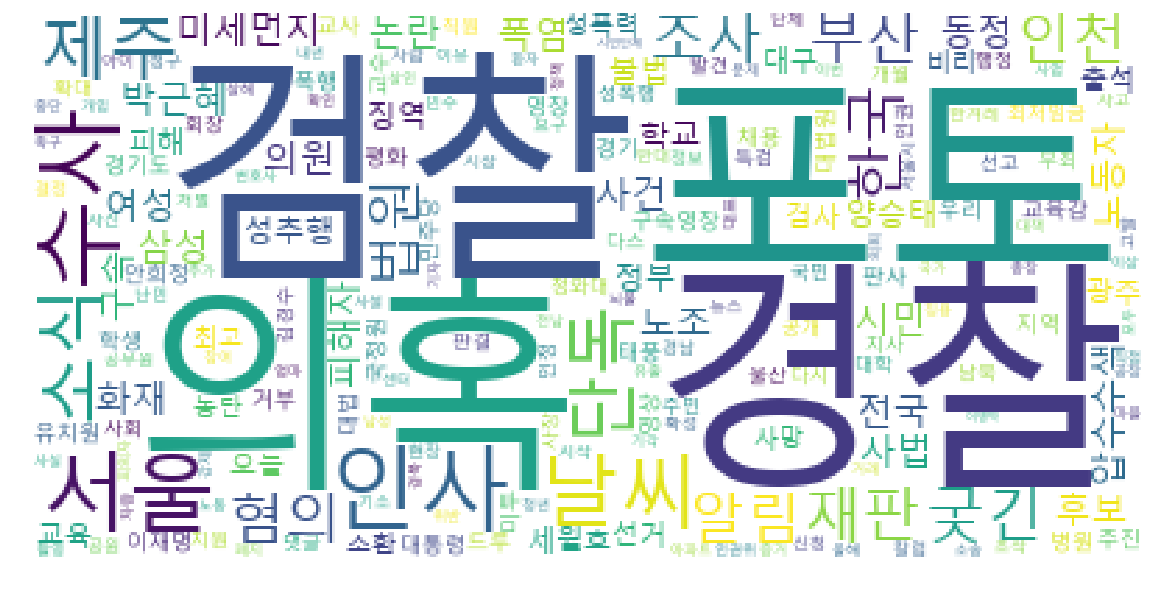

In [27]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

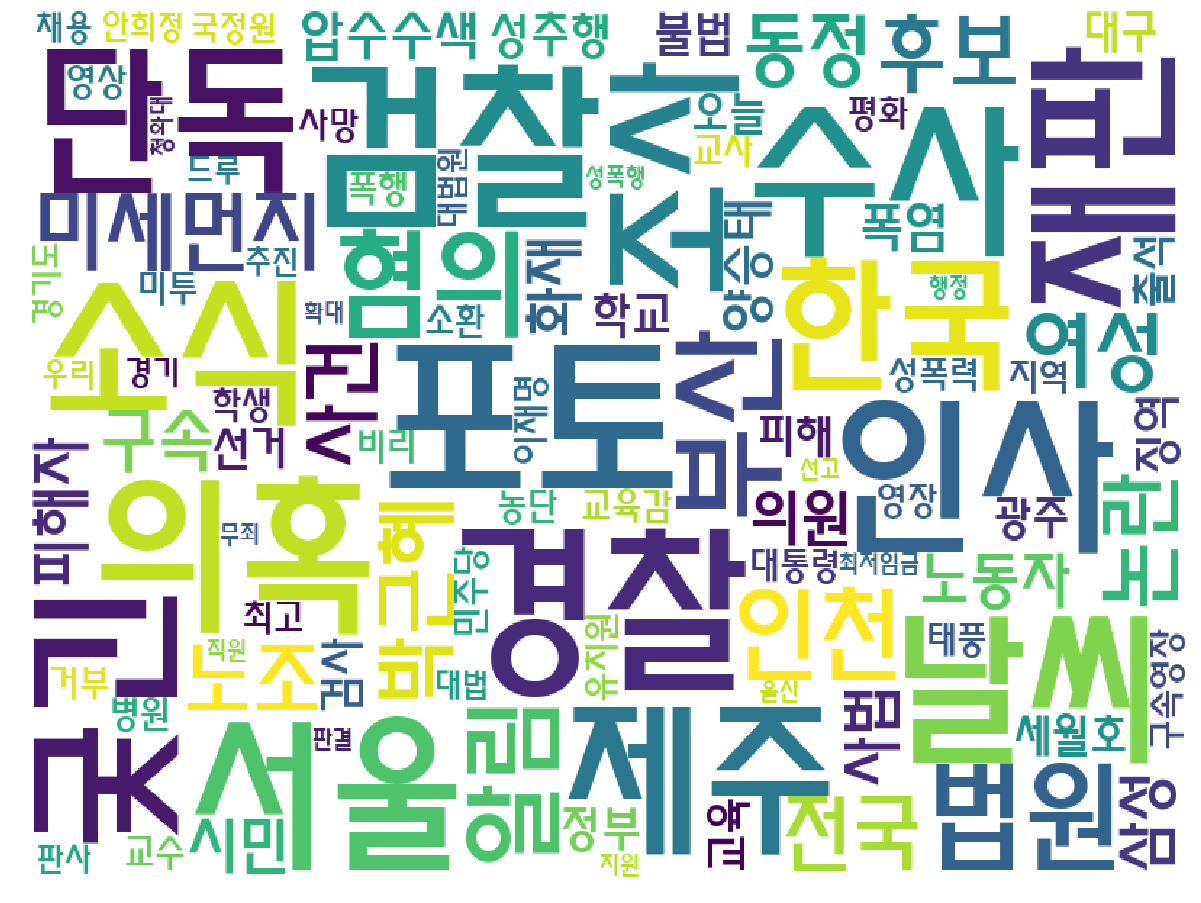

In [28]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'teample_1_result/society_1.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)